#### Introduction to Sentiment Analysis

Sentiment analysis, also known as opinion mining, is a technique used in natural language processing (NLP) to determine the emotional tone behind words. It involves analyzing customer feedback, reviews, and social media mentions to gauge public sentiment towards a product, service, or brand. By categorizing opinions as positive, negative, or neutral, businesses can gain valuable insights into customer perceptions and preferences.

#### Importance of Sentiment Analysis

1.  Understanding Customer Feedback:Sentiment analysis allows companies to process vast amounts of customer feedback efficiently. By automating the analysis of reviews, businesses can quickly identify common themes and sentiments, which helps in understanding customer satisfaction and areas needing improvement.
    
2.  Product Improvement:Analyzing sentiment helps in pinpointing specific product features that customers like or dislike. This information is crucial for product development teams to make informed decisions about which features to enhance, modify, or remove, leading to better products that meet customer expectations.
    
3.  Brand Reputation Management:Monitoring sentiment around a brand helps in managing its reputation. By identifying and addressing negative sentiments promptly, companies can mitigate potential PR crises and improve their overall brand image. Positive sentiments, on the other hand, can be leveraged for marketing and promotional activities.
    
4.  Competitive Analysis:Sentiment analysis can be used to compare customer sentiments towards competing products. This comparative analysis provides insights into competitors' strengths and weaknesses, helping businesses to strategize and position their products more effectively in the market.
    
5.  Customer Experience Enhancement:By understanding customer emotions and experiences, businesses can tailor their customer service and support efforts to better meet the needs of their customers. This leads to enhanced customer satisfaction and loyalty.
    

#### Benefits of Sentiment Analysis

1.  Data-Driven Decision Making:Sentiment analysis transforms qualitative data from reviews into quantitative insights, enabling businesses to make data-driven decisions. This objective analysis helps in prioritizing actions that will have the most significant impact on customer satisfaction and business outcomes.
    
2.  Proactive Issue Resolution:By identifying negative sentiments early, companies can address issues before they escalate. This proactive approach helps in resolving problems quickly, improving customer relations, and preventing potential losses.
    
3.  Enhanced Marketing Strategies:Understanding customer sentiment allows for more targeted and effective marketing campaigns. Positive reviews and sentiments can be used in promotional materials, while insights from negative feedback can inform adjustments to marketing strategies.
    
4.  Improved Customer Retention:Sentiment analysis helps in identifying dissatisfied customers who are at risk of churning. By addressing their concerns and improving their experience, businesses can increase customer retention rates and build long-term loyalty.
    
5.  Personalized Customer Interactions:Sentiment analysis provides insights into individual customer preferences and sentiments, enabling businesses to personalize interactions. This personalized approach enhances the overall customer experience and fosters stronger relationships.

In [4]:
# Import statements



from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import pandas as pd
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier

#### Prerequisites

1.  Ensure you have an active Azure subscription.
    
2.  Create an Azure Storage account if you don't have one.
    

### Step-by-Step Guide

1.  **Install Required Libraries:**
    
    *   Install the Azure Storage Blob library using pip.
        
2.  **Retrieve Connection String:**
    
    *   Navigate to your Storage Account in the Azure portal.
        
    *   Under the "Settings" section, click on "Access keys".
        
    *   Copy the connection string from "key1" or "key2".
        
3.  **Add Connection String to Your Notebook:**
    
    *   Use the connection string to create a BlobServiceClient object in your notebook.
        
4.  **Verify the Connection:**
    
    *   List the containers to ensure that the connection is established.
        
5.  **Upload a Blob:**
    
    *   Use the BlobClient object to upload a file to a specified container and blob name.
        
6.  **Download a Blob:**
    
    *   Use the BlobClient object to download a blob from a specified container and blob name.
        

By following these steps, you'll be able to connect to Azure Blob Storage and manage your blobs using a connection string in your notebook.

In [5]:


# Replace with your actual connection string
connection_string = 'DefaultEndpointsProtocol=https;AccountName=amazonreviewshubh;AccountKey=rChN0i+1xpSOUKLPPQCeyoVYr40JetmaNaqncUdP4lF1PyUz2apvwU2s5ezsSmpOXmUJU+xQJbfl+ASt5quIYQ==;EndpointSuffix=core.windows.net'
container_name = 'amazonreviews'
blob_name = 'Amazon_Reviews.csv'  # The name of your blob (CSV file)

# Create a BlobServiceClient object
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

# Create a BlobClient to interact with the specific blob
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Download the blob data into a bytes object
downloaded_blob = blob_client.download_blob().readall()

# Convert the bytes object to a pandas DataFrame
df = pd.read_csv(io.BytesIO(downloaded_blob))

# Display the DataFrame



In [6]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [7]:
# print various attributes available in the dataset
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [8]:
# print properties of attributes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [9]:
# Code for Sentimental Analysis


In [10]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

df['sentiment'] = np.where(df['star_rating'] == 5.0, 1,
                           np.where(df['star_rating'] == 4.0, 1, 0))

In [11]:
# get unique values of product title column
df["product_title"].unique()

array(['Fire HD 7, 7" HD Display, Wi-Fi, 8 GB'], dtype=object)

In [12]:
# choose a particular product for analysis
prod_hosa = df.loc[df["product_title"]=='Fire HD 7, 7" HD Display, Wi-Fi, 8 GB']
prod_hosa

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [15]:
# #split data-set to train and test

X = prod_hosa.drop("sentiment",axis=1)
Y = prod_hosa['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [17]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [19]:
removeHTML('Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.')

'Lots of adsSlow processing speedOccasionally shuts down appsWIFI keeps having authentication issuesWas cheap for a tablet and now i know why.'

In [23]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [24]:
removeSpecialChar("shubhankitsirvaiya@gmail.com")

'shubhankitsirvaiya gmail com'

In [26]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [27]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [28]:
X_train.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
29034,US,1113425,R3BDLOP3XKYYM5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,love it,2014-12-03
4015,US,37264917,R2Z6MUY8GKH9PL,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Love my Fire HD 7,2015-06-26
4101,US,17964606,R27S3T7YOA16OP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,I like the Fire but I had some problems using ...,I like the Fire but I had some problems using ...,2015-06-25
9952,US,41424895,R1R4J1676Y1AHG,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,1,N,Y,No Google Play,"Nice tablet but doesn't allow Google play, Ama...",2015-05-01
7109,US,40238598,R93I942O7LM0K,B00LCHOCZY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,Five Stars,love it,2015-05-21


In [29]:
# X_training clean set
X_train_cleaned = []

for val in X_train['review_body']:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_train_cleaned.append(val) 

C:\Users\Shubhankit\AppData\Local\Temp\ipykernel_163176\3357511827.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [30]:
# X_testing clean set
X_test_cleaned = []

for val in X_test['review_body']:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val) 

C:\Users\Shubhankit\AppData\Local\Temp\ipykernel_163176\3357511827.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [32]:
X_train_cleaned

['love it',
 'love my fire hd',
 'i like the fire but i had some problems using the books i did not know to press on the side to get the first part of a book',
 'nice tablet but doesn t allow google play amazon has stopped the fix called rooting so that you can use the play store',
 'love it',
 'love this',
 'my year old loves his new fire',
 'awesome i just wish you could put what you want on the main screen like a background picture like on an iphone not what app or book that you were in last i m sure it will happen though love my kindles anyway',
 'i m sure the device is just fine the problem is the user i find it confusing and perplexing and not easy to use',
 'a nice tablet for the price the apps available in amazon are limited but it works well for what i use it for which is reading online and streaming music to my stereo via bluetooth',
 'love it love it what s not to like everything literally at your fingertips user friendly price is right and you look cool using it we re old a

**Vectorization**

In [33]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of 
# raw strings.
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

In [34]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

LinearSVC(dual=False)

In [35]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.770000,0.630000,0.700000,1018.000000
1,0.930000,0.960000,0.950000,5152.000000
accuracy,0.910000,0.910000,0.910000,0.910000
macro avg,0.850000,0.800000,0.820000,6170.000000
weighted avg,0.900000,0.910000,0.900000,6170.000000


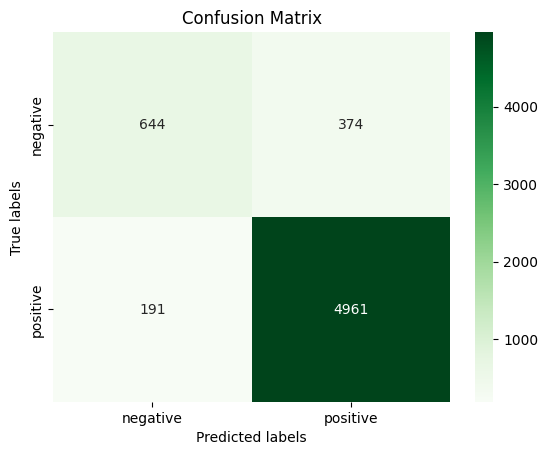

In [36]:
# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [37]:
# testing the model with sample 'Negative' review
demo_review = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [38]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(svr_lin.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [41]:
# Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tvec, Y_train)

RandomForestClassifier()

In [40]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
ranfrst_predictions = random_forest.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.820000,0.280000,0.410000,1018.000000
1,0.870000,0.990000,0.930000,5152.000000
accuracy,0.870000,0.870000,0.870000,0.870000
macro avg,0.840000,0.630000,0.670000,6170.000000
weighted avg,0.860000,0.870000,0.840000,6170.000000


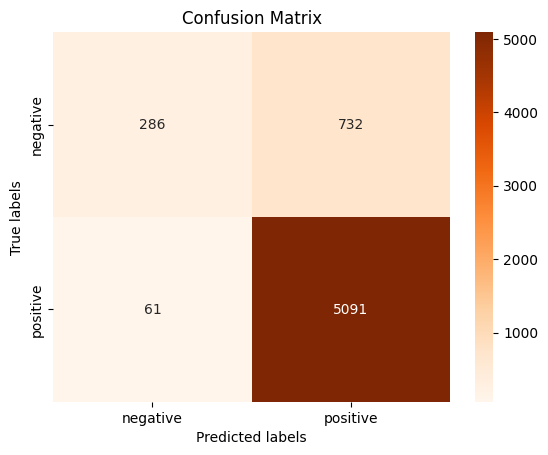

In [42]:
# confusion matrix
ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [43]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Do not buy. Fake Product.'])
demo_review_X_test = tvec.transform(demo_review)
print(random_forest.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [44]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Original Product. Great Performance.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(random_forest.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [45]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_tvec, Y_train)

KNeighborsClassifier()

In [46]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("gray", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.740000,0.030000,0.060000,1018.000000
1,0.840000,1.000000,0.910000,5152.000000
accuracy,0.840000,0.840000,0.840000,0.840000
macro avg,0.790000,0.510000,0.490000,6170.000000
weighted avg,0.820000,0.840000,0.770000,6170.000000


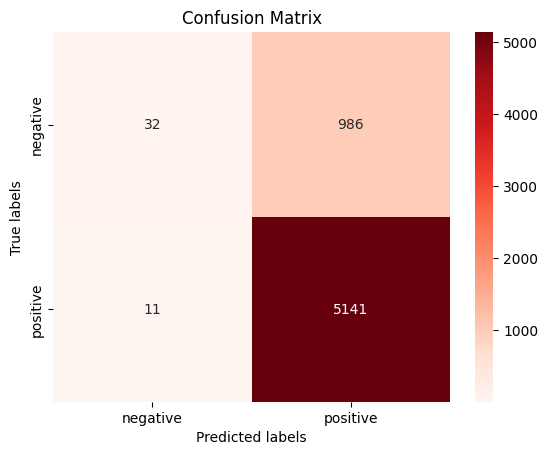

In [47]:
# confusion matrix
knn_predictions=knn.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [48]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Bad product. Very much disappointed'])
demo_review_X_test = tvec.transform(demo_review)
print(knn.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [49]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(knn.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [51]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

LogisticRegression()

In [52]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.790000,0.590000,0.670000,1018.000000
1,0.920000,0.970000,0.950000,5152.000000
accuracy,0.910000,0.910000,0.910000,0.910000
macro avg,0.860000,0.780000,0.810000,6170.000000
weighted avg,0.900000,0.910000,0.900000,6170.000000


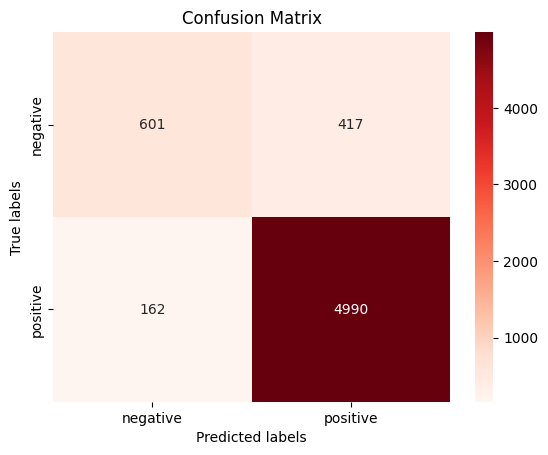

In [53]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Poor quality. Faulty device.'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

In [ ]:
# testing the model with sample 'Positive' review
demo_review_2 = np.array(['Best product.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

In [ ]:
# Code for Sentimental Analysis

# Ends

In [54]:
X_test

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
29301,US,14838102,R7IJPG60A4VWG,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,8,8,N,N,Good but not great,I would give this 5 stars but the frustration ...,2014-11-30
19920,US,1191454,R2OOV5F4V6BSR3,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,perfect,2015-01-11
17408,US,37457316,R2FEWTUJ7VLR8Q,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,great deal,It does everything that is advertised,2015-01-28
2898,US,48533314,R35Y6OTXB0YJOH,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,N,Five Stars,My husband loves it !,2015-07-15
22257,US,19313349,R284PYAQNLCDZX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,nice and useful,I like this Kindle. It's easy to use and the l...,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,US,8507185,R30CK5OQ0BX1QP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,addicted,Love it!,2015-02-16
1009,US,47386214,RTO0B2P8MV0JX,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,"Great gift, even for dads","My wife got this for my birthday, I stayed up...",2015-08-12
24705,US,1471625,R1RH2BRTWM6BI5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Great,It is a great iteam the only down size is that...,2015-01-02
26320,US,21185945,R1SKVYV6483YW6,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,Y,great apps to choose from,I'm really enjoying my Fire HD 7! Definitely a...,2014-12-24


In [55]:
Testing_Output=X_test

In [56]:
Testing_Output['Review']=svr_lin_predictions

In [59]:
Testing_Output

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Review
29301,US,14838102,R7IJPG60A4VWG,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,8,8,N,N,Good but not great,I would give this 5 stars but the frustration ...,2014-11-30,Negative
19920,US,1191454,R2OOV5F4V6BSR3,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,perfect,2015-01-11,Positive
17408,US,37457316,R2FEWTUJ7VLR8Q,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,great deal,It does everything that is advertised,2015-01-28,Positive
2898,US,48533314,R35Y6OTXB0YJOH,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,N,Five Stars,My husband loves it !,2015-07-15,Positive
22257,US,19313349,R284PYAQNLCDZX,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,nice and useful,I like this Kindle. It's easy to use and the l...,2015-01-05,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,US,8507185,R30CK5OQ0BX1QP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,Y,addicted,Love it!,2015-02-16,Positive
1009,US,47386214,RTO0B2P8MV0JX,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,"Great gift, even for dads","My wife got this for my birthday, I stayed up...",2015-08-12,Positive
24705,US,1471625,R1RH2BRTWM6BI5,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Great,It is a great iteam the only down size is that...,2015-01-02,Positive
26320,US,21185945,R1SKVYV6483YW6,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1,1,N,Y,great apps to choose from,I'm really enjoying my Fire HD 7! Definitely a...,2014-12-24,Positive


In [57]:
Testing_Output['Review'] = Testing_Output['Review'].replace({1: 'Positive', 0: 'Negative'})

In [60]:
Testing_Output.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'Review'],
      dtype='object')

In [61]:

# Replace with your actual connection string
connection_string = 'DefaultEndpointsProtocol=https;AccountName=amazonreviewshubh;AccountKey=rChN0i+1xpSOUKLPPQCeyoVYr40JetmaNaqncUdP4lF1PyUz2apvwU2s5ezsSmpOXmUJU+xQJbfl+ASt5quIYQ==;EndpointSuffix=core.windows.net'
container_name = 'amazonreviews'
blob_name = 'testing_output.csv'  # The name you want to give to your blob



# Convert DataFrame to CSV
csv_data = Testing_Output.to_csv(index=False)

# Create a BlobServiceClient object
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

# Create a BlobClient to interact with the specific blob
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Upload the CSV data to the blob
blob_client.upload_blob(csv_data, overwrite=True)

print(f"Data uploaded to {container_name}/{blob_name}")


Data uploaded to amazonreviews/testing_output.csv
